In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('./flows/transito_recife_02122016.csv', sep=';')
print('Total rows', df.shape[0])
df.dropna(axis=0, how='any', inplace=True)
print('Total not null rows', df.shape[0])

Total rows 16794
Total not null rows 16789


In [3]:
df.dtypes

Logradouro             object
Intervalo de Datas     object
Hora                   object
Caminhão grande       float64
Caminhão md/grd       float64
Caminhão peq/md       float64
Caminhão pequeno      float64
Moto                  float64
Não Reconhecido       float64
Ônibus grande         float64
Ônibus pequeno        float64
Passeio grande        float64
Passeio pequeno       float64
dtype: object

In [5]:
names_mapper = {
    'Logradouro': 'place', 
    'Intervalo de Datas': 'day',
    'Hora': 'time_of_day', 
    'Caminhão grande': 'huge_truck',
    'Caminhão md/grd': 'big_truck',
    'Caminhão peq/md': 'medium_truck',
    'Caminhão pequeno': 'small_truck',
    'Moto': 'motocycle',
    'Não Reconhecido': 'other',
    'Ônibus grande': 'big_bus',
    'Ônibus pequeno': 'small_bus',
    'Passeio grande': 'big_car',
    'Passeio pequeno': 'small_car',
}
vehicules_columns = [
    'huge_truck',
    'big_truck',
    'medium_truck',
    'small_truck',
    'motocycle',
    'other',
    'big_bus',
    'small_bus',
    'big_car',
    'small_car'
]
df.rename(mapper=names_mapper, inplace=True, axis='columns')
df['total'] = df[vehicules_columns].sum(axis=1)
df.dtypes

place            object
day              object
time_of_day      object
huge_truck      float64
big_truck       float64
medium_truck    float64
small_truck     float64
motocycle       float64
other           float64
big_bus         float64
small_bus       float64
big_car         float64
small_car       float64
total           float64
dtype: object

In [6]:
df.sample(5)

,place,day,time_of_day,huge_truck,big_truck,medium_truck,small_truck,motocycle,other,big_bus,small_bus,big_car,small_car,total
8943,AV. GOV. AGAMENON MAGALHAES - PROX. VIADUTO PR...,14/6/2015,03:45:00 - 03:59:59,1.0,0.0,1.0,0.0,2.0,9.0,1.0,0.0,36.0,68.0,118.0
2925,"R. ARQUITETO LUIZ NUNES, B. IMBIRIBEIRA ENTRE...",13/6/2015,17:00:00 - 17:14:59,0.0,3.0,1.0,0.0,21.0,6.0,5.0,0.0,2.0,173.0,211.0
1471,AVENIDA BOA VIAGEM - TERCEIRO JARDIM,9/6/2015,14:30:00 - 14:44:59,0.0,2.0,0.0,0.0,17.0,10.0,0.0,0.0,1.0,118.0,148.0
3509,"AV. GENERAL SAN MARTIN , 1864",10/6/2015,02:00:00 - 02:14:59,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,11.0,16.0
9184,AV. GOV. AGAMENON MAGALHAES - PROX. VIADUTO PR...,9/6/2015,16:00:00 - 16:14:59,0.0,7.0,3.0,0.0,168.0,28.0,6.0,0.0,37.0,647.0,896.0


In [7]:
df.describe()

,huge_truck,big_truck,medium_truck,small_truck,motocycle,other,big_bus,small_bus,big_car,small_car,total
count,16789.000000,16789.000000,16789.000000,16789.0,16789.000000,16789.000000,16789.000000,16789.0,16789.000000,16789.000000,16789.000000
mean,1.535767,2.886652,2.384001,0.0,21.940854,7.235809,5.529335,0.0,9.036572,169.426172,219.975162
std,2.322926,4.253573,3.277523,0.0,23.369093,9.389379,6.992179,0.0,9.742459,139.714839,176.261652
min,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.0,5.000000,1.000000,1.000000,0.0,2.000000,49.000000,70.000000
50%,1.000000,1.000000,1.000000,0.0,15.000000,4.000000,3.000000,0.0,6.000000,144.000000,190.000000
75%,2.000000,4.000000,3.000000,0.0,31.000000,10.000000,8.000000,0.0,13.000000,258.000000,333.000000
max,41.000000,41.000000,31.000000,0.0,225.000000,81.000000,55.000000,0.0,79.000000,800.000000,1036.000000


In [8]:
days = df['day']
times_of_day = df['time_of_day'].apply(lambda x: x.split('-')[0])
df['date'] = pd.to_datetime(days + ' ' + times_of_day, dayfirst=True)
df['day'] = pd.to_datetime(days, dayfirst=True)

import re


def float_hour(str_hour):
    hh, mm, ss = re.findall('\d\d', str_hour)
    return int(hh) + int(mm)/60.0 + int(ss)/3600.0


df['hour'] = times_of_day.apply(float_hour)


In [9]:
df[['date', 'day', 'hour']].sample(5)

,date,day,hour
13960,2015-06-10 23:45:00,2015-06-10,23.75
15382,2015-06-12 09:15:00,2015-06-12,9.25
5496,2015-06-10 07:30:00,2015-06-10,7.50
14210,2015-06-13 14:15:00,2015-06-13,14.25
571,2015-06-14 04:15:00,2015-06-14,4.25


In [10]:
df.dtypes

place                   object
day             datetime64[ns]
time_of_day             object
huge_truck             float64
big_truck              float64
medium_truck           float64
small_truck            float64
motocycle              float64
other                  float64
big_bus                float64
small_bus              float64
big_car                float64
small_car              float64
total                  float64
date            datetime64[ns]
hour                   float64
dtype: object


In [11]:
df.to_pickle('./preprocessed.pkl')

In [12]:
df2 = pd.read_pickle('./preprocessed.pkl')

In [13]:
df2.dtypes

place                   object
day             datetime64[ns]
time_of_day             object
huge_truck             float64
big_truck              float64
medium_truck           float64
small_truck            float64
motocycle              float64
other                  float64
big_bus                float64
small_bus              float64
big_car                float64
small_car              float64
total                  float64
date            datetime64[ns]
hour                   float64
dtype: object

In [14]:
df2.sample(5)

,place,day,time_of_day,huge_truck,big_truck,medium_truck,small_truck,motocycle,other,big_bus,small_bus,big_car,small_car,total,date,hour
11885,"AV. MAL. MASCARENHAS DE MORAES, AEROP BAIRRO I...",2015-06-09,12:30:00 - 12:44:59,6.0,5.0,1.0,0.0,7.0,18.0,2.0,0.0,13.0,177.0,229.0,2015-06-09 12:30:00,12.50
1528,AVENIDA BOA VIAGEM - TERCEIRO JARDIM,2015-06-10,05:15:00 - 05:29:59,1.0,3.0,4.0,0.0,30.0,5.0,1.0,0.0,4.0,211.0,259.0,2015-06-10 05:15:00,5.25
12684,"AV. MAL. MASCARENHAS DE MORAES, AEROP BAIRRO I...",2015-06-10,20:45:00 - 20:59:59,8.0,13.0,2.0,0.0,19.0,18.0,4.0,0.0,15.0,248.0,327.0,2015-06-10 20:45:00,20.75
2230,AVENIDA BOA VIAGEM - TERCEIRO JARDIM,2015-06-10,14:30:00 - 14:44:59,1.0,4.0,1.0,0.0,16.0,3.0,1.0,0.0,21.0,217.0,264.0,2015-06-10 14:30:00,14.50
4207,"AV. AFONSO OLINDENSE, N. 996 BAIRRO: VARZEA",2015-06-10,09:15:00 - 09:29:59,2.0,5.0,11.0,0.0,28.0,8.0,3.0,0.0,3.0,92.0,152.0,2015-06-10 09:15:00,9.25


In [22]:
def shiftted(group):
    vehicules_columns = [
        'huge_truck',
        'big_truck',
        'medium_truck',
        'small_truck',
        'motocycle',
        'other',
        'big_bus',
        'small_bus',
        'big_car',
        'small_car',
        'total'
    ]

    dsorted = group.sort_values('date')
    d0 = dsorted[2:].reset_index(drop=True)
    d1 = dsorted[1:-1][vehicules_columns].reset_index(drop=True)
    
    d1.columns = [c + '_1' for c in vehicules_columns]
    
    
    d2 = dsorted[:-2][vehicules_columns].reset_index(drop=True)
    d2.columns = [c + '_2' for c in vehicules_columns]
    
    return pd.concat([d0, d1, d2], axis=1)

dfgroup = df2.groupby(['place', 'day']).apply(shiftted).reset_index(drop=True)
print(dfgroup.shape)
dfgroup.sample(3)

(16515, 38)


,place,day,time_of_day,huge_truck,big_truck,medium_truck,small_truck,motocycle,other,big_bus,...,big_truck_2,medium_truck_2,small_truck_2,motocycle_2,other_2,big_bus_2,small_bus_2,big_car_2,small_car_2,total_2
1864,"AV. DOM JOAO VI, EM FRT. AO PT. DE ONIBUS N.01...",2015-06-14,15:30:00 - 15:44:59,0.0,1.0,0.0,0.0,7.0,2.0,0.0,...,0.0,0.0,0.0,9.0,1.0,0.0,0.0,1.0,129.0,141.0
15948,"R. ARQUITETO LUIZ NUNES, B. IMBIRIBEIRA ENTRE...",2015-06-14,03:00:00 - 03:14:59,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,39.0,42.0
11667,AVENIDA BOA VIAGEM - ENTRE OS NRS. 6114 E 5888,2015-06-14,23:15:00 - 23:29:59,0.0,0.0,0.0,0.0,2.0,1.0,0.0,...,1.0,0.0,0.0,2.0,2.0,0.0,0.0,18.0,72.0,95.0


In [40]:
dfgroup.to_pickle('./shifted.pkl')

In [41]:
df = pd.read_pickle('./shifted.pkl')

In [42]:
df.sample(3)

,place,day,time_of_day,huge_truck,big_truck,medium_truck,small_truck,motocycle,other,big_bus,...,big_truck_2,medium_truck_2,small_truck_2,motocycle_2,other_2,big_bus_2,small_bus_2,big_car_2,small_car_2,total_2
13090,"Av. Cais Santa Rita, proximo ao n.675",2015-06-09,04:30:00 - 04:44:59,3.0,1.0,0.0,0.0,5.0,0.0,11.0,...,1.0,0.0,0.0,2.0,0.0,1.0,0.0,2.0,5.0,13.0
7530,"AV. MAL. MASCARENHAS DE MORAES, AEROP BAIRRO I...",2015-06-12,09:45:00 - 09:59:59,6.0,25.0,14.0,0.0,32.0,1.0,1.0,...,22.0,8.0,0.0,24.0,4.0,2.0,0.0,23.0,259.0,343.0
7586,"AV. MAL. MASCARENHAS DE MORAES, AEROP BAIRRO I...",2015-06-12,13:15:00 - 13:29:59,4.0,5.0,9.0,0.0,31.0,3.0,3.0,...,10.0,4.0,0.0,32.0,6.0,4.0,0.0,13.0,273.0,347.0


In [43]:
df.dtypes

place                     object
day               datetime64[ns]
time_of_day               object
huge_truck               float64
big_truck                float64
medium_truck             float64
small_truck              float64
motocycle                float64
other                    float64
big_bus                  float64
small_bus                float64
big_car                  float64
small_car                float64
total                    float64
date              datetime64[ns]
hour                     float64
huge_truck_1             float64
big_truck_1              float64
medium_truck_1           float64
small_truck_1            float64
motocycle_1              float64
other_1                  float64
big_bus_1                float64
small_bus_1              float64
big_car_1                float64
small_car_1              float64
total_1                  float64
huge_truck_2             float64
big_truck_2              float64
medium_truck_2           float64
small_truc

In [44]:
import numpy as np
from sklearn.base import TransformerMixin

class CategoricalEncoder(TransformerMixin):
    def fit(self, y):
        self._imap = np.unique(y)
        return self

    def transform(self, y):
        return np.argmax(np.repeat(np.asarray(y).reshape(-1, 1), len(self._imap), axis=1) == self._imap, axis=1)

    def inverse_transform(self, y):
        return self._imap[y]

class IdentityEncoder(TransformerMixin):
    def fit(self, y):
        return self

    def transform(self, y):
        return y

    def inverse_transform(self, y):
        return y

feature_encoders = {
    'time_of_day': CategoricalEncoder(),
    'huge_truck_1': IdentityEncoder(),
    'big_truck_1': IdentityEncoder(),
    'medium_truck_1': IdentityEncoder(),
    'small_truck_1': IdentityEncoder(),
    'motocycle_1': IdentityEncoder(),
    'other_1': IdentityEncoder(),
    'big_bus_1': IdentityEncoder(),
    'small_bus_1': IdentityEncoder(),
    'big_car_1': IdentityEncoder(),
    'small_car_1': IdentityEncoder(),
    'total_1': IdentityEncoder(),
    'huge_truck_2': IdentityEncoder(),
    'big_truck_2': IdentityEncoder(),
    'medium_truck_2': IdentityEncoder(),
    'small_truck_2': IdentityEncoder(),
    'motocycle_2': IdentityEncoder(),
    'other_2': IdentityEncoder(),
    'big_bus_2': IdentityEncoder(),
    'small_bus_2': IdentityEncoder(),
    'big_car_2': IdentityEncoder(),
    'small_car_2': IdentityEncoder(),
    'total_2': IdentityEncoder(),
}


column_encoder = {}
column_encodded = {}
for column, encoder in feature_encoders.items():
    column_encodded[column] = encoder.fit_transform(df[column])
    column_encoder[column] = encoder

pd.DataFrame(column_encodded).to_pickle('./encodded.pkl')

In [45]:
Y = df['total']
X = pd.read_pickle('./encodded.pkl')



--------------------------------------------------------------------------------
DummyRegressor(constant=None, quantile=None, strategy='mean')
Errors report:
MSR=31057.743		MAR=132.411		EVS=0.000		R2=0.000


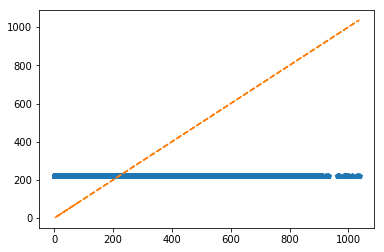

--------------------------------------------------------------------------------
DummyRegressor(constant=None, quantile=None, strategy='median')
Errors report:
MSR=31875.076		MAR=130.000		EVS=0.000		R2=-0.026


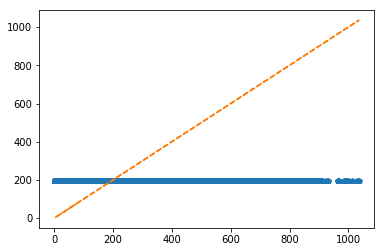

In [53]:
from sklearn.metrics import explained_variance_score, median_absolute_error, r2_score, mean_squared_error

def report_cls(cls, X, y):
    print('-'*80)
    print(cls)
    ypred = cls.predict(X)
    
    print('Errors report:')
    print('MSR={:>5.3f}\t\tMAR={:>5.3f}\t\tEVS={:>5.3f}\t\tR2={:>5.3f}'.format(
        mean_squared_error(y, ypred),
        median_absolute_error(y, ypred),
        explained_variance_score(y, ypred),
        r2_score(y, ypred)
    ))
    
    plt.plot(y, ypred, 'p')
    plt.plot(y, y, '--')
    plt.show()


from sklearn.dummy import DummyRegressor

_X = np.zeros_like(Y).reshape(-1, 1)
cls = DummyRegressor(strategy='mean')
cls.fit(_X, Y)
report_cls(cls, _X, Y)


cls = DummyRegressor(strategy='median')
cls.fit(_X, Y)
report_cls(cls, _X, Y)



--------------------------------------------------------------------------------
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
Errors report:
MSR=1352.071		MAR=11.500		EVS=0.956		R2=0.956


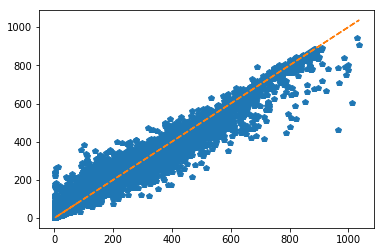

In [54]:
from sklearn.ensemble import RandomForestRegressor

cls = RandomForestRegressor()
cls.fit(X, Y)
report_cls(cls, X, Y)
